In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (replace with your file path)
df = pd.read_csv('StudentsPerformance.csv')

# Create target variable: categorize math score
df['performance'] = pd.cut(df['math score'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Drop rows with missing values if any
df.dropna(inplace=True)

# Features you want to use
feature_columns = ['gender', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']

# One-hot encode categorical features
X = pd.get_dummies(df[feature_columns])

# Convert target labels to numeric codes
y = df['performance'].astype('category').cat.codes

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))


Accuracy: 0.755
              precision    recall  f1-score   support

         Low       0.78      0.80      0.79        66
      Medium       0.75      0.78      0.76       101
        High       0.73      0.58      0.64        33

    accuracy                           0.76       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.75      0.76      0.75       200



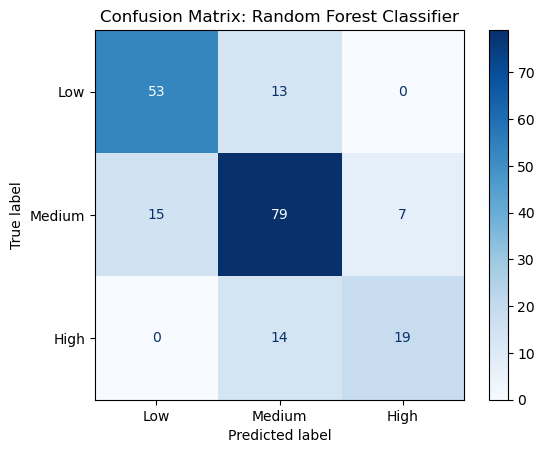

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])  # 0=Low,1=Medium,2=High

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest Classifier')
plt.show()


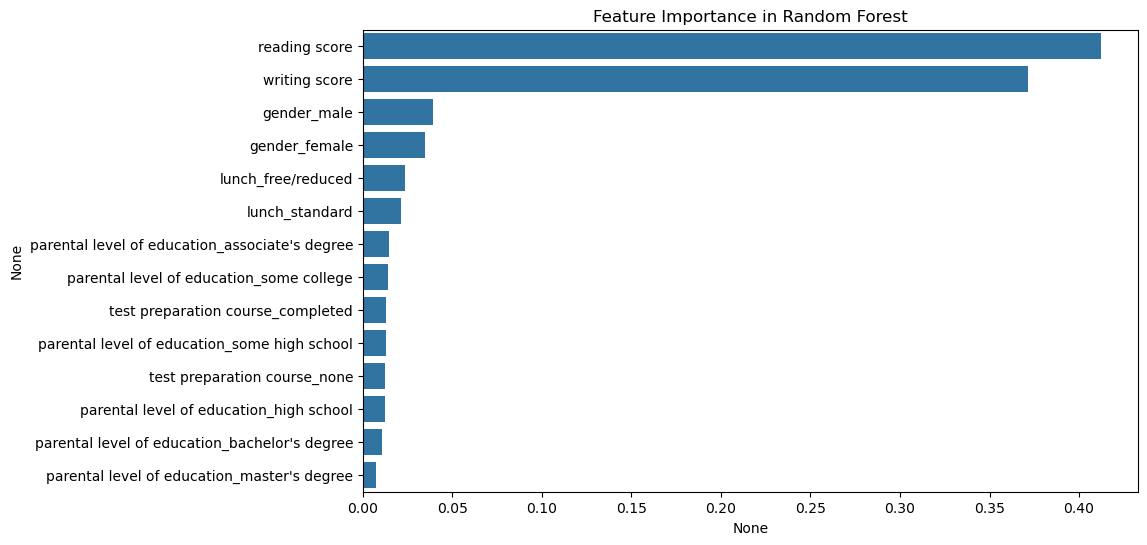

In [51]:
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance in Random Forest')
plt.show()
